In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import math,copy
import os
from scipy import optimize
%matplotlib inline
np.set_printoptions(precision=2)

In [3]:
rain_train_data = pd.read_csv("weather_train.csv")
display(rain_train_data)


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,01-12-2008,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,02-12-2008,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,03-12-2008,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,04-12-2008,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,05-12-2008,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52057,21-06-2017,Tuggeranong,-1.2,15.1,0.4,NaN,NaN,WSW,15.0,NaN,...,100.0,38.0,1028.8,1026.3,NaN,NaN,-0.4,14.7,No,No
52058,22-06-2017,Tuggeranong,-0.4,14.0,0.0,NaN,NaN,N,24.0,NaN,...,83.0,44.0,1029.5,1025.0,NaN,NaN,6.0,13.1,No,No
52059,23-06-2017,Tuggeranong,-3.5,13.4,0.0,NaN,NaN,NW,33.0,SW,...,100.0,38.0,1022.0,1016.1,NaN,NaN,0.1,12.9,No,No
52060,24-06-2017,Tuggeranong,0.1,14.5,0.0,NaN,NaN,NW,35.0,N,...,64.0,43.0,1017.1,1015.4,NaN,NaN,9.5,13.1,No,No


In [4]:
rain_train_data.columns


Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [5]:
rain_train_data["RainTomorrow"].replace("No",0,inplace=True)
rain_train_data["RainTomorrow"].replace("Yes",1,inplace=True)
display(rain_train_data)



,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,01-12-2008,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0
1,02-12-2008,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0
2,03-12-2008,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0
3,04-12-2008,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,0
4,05-12-2008,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52057,21-06-2017,Tuggeranong,-1.2,15.1,0.4,NaN,NaN,WSW,15.0,NaN,...,100.0,38.0,1028.8,1026.3,NaN,NaN,-0.4,14.7,No,0
52058,22-06-2017,Tuggeranong,-0.4,14.0,0.0,NaN,NaN,N,24.0,NaN,...,83.0,44.0,1029.5,1025.0,NaN,NaN,6.0,13.1,No,0
52059,23-06-2017,Tuggeranong,-3.5,13.4,0.0,NaN,NaN,NW,33.0,SW,...,100.0,38.0,1022.0,1016.1,NaN,NaN,0.1,12.9,No,0
52060,24-06-2017,Tuggeranong,0.1,14.5,0.0,NaN,NaN,NW,35.0,N,...,64.0,43.0,1017.1,1015.4,NaN,NaN,9.5,13.1,No,0


In [6]:
mean_1 = np.mean(rain_train_data["Cloud9am"])
mean_2 = np.mean(rain_train_data["Cloud3pm"])
mean_3 = np.mean(rain_train_data["Evaporation"])
mean_4 = np.mean(rain_train_data["Sunshine"])
mean_5 = np.mean(rain_train_data["WindGustSpeed"])
mean_6 = np.mean(rain_train_data["WindSpeed9am"])
mean_7 = np.mean(rain_train_data["WindSpeed3pm"])
mean_8 = np.mean(rain_train_data["Humidity3pm"])
mean_9 = np.mean(rain_train_data["Pressure9am"])
mean_10 = np.mean(rain_train_data["Pressure3pm"])
mean_11 = np.mean(rain_train_data["Temp9am"])
mean_12 = np.mean(rain_train_data["Temp3pm"])
mean_13 = np.mean(rain_train_data["MinTemp"])
mean_14 = np.mean(rain_train_data["MaxTemp"])
mean_15 = np.mean(rain_train_data["Rainfall"])
mean_16 = np.mean(rain_train_data["Humidity9am"])

rain_train_data["Cloud9am"].fillna(value = mean_1,inplace=True)
rain_train_data["Cloud3pm"].fillna(value = mean_2,inplace=True)
rain_train_data["Evaporation"].fillna(value = mean_3,inplace=True)
rain_train_data["Sunshine"].fillna(value = mean_4,inplace=True)
rain_train_data["WindGustSpeed"].fillna(value = mean_5,inplace=True)
rain_train_data["WindSpeed9am"].fillna(value = mean_6,inplace=True)
rain_train_data["WindSpeed3pm"].fillna(value = mean_7,inplace=True)
rain_train_data["Humidity3pm"].fillna(value = mean_8,inplace=True)
rain_train_data["Pressure9am"].fillna(value = mean_9,inplace=True)
rain_train_data["Pressure3pm"].fillna(value = mean_10,inplace=True)
rain_train_data["Temp9am"].fillna(value = mean_11,inplace=True)
rain_train_data["Temp3pm"].fillna(value = mean_12,inplace=True)
rain_train_data["MinTemp"].fillna(value = mean_13,inplace=True)
rain_train_data["MaxTemp"].fillna(value = mean_14,inplace=True)
rain_train_data["Rainfall"].fillna(value = mean_15,inplace=True)
rain_train_data["Humidity9am"].fillna(value = mean_16,inplace=True)
display(rain_train_data)


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,01-12-2008,Albury,13.4,22.9,0.6,5.52876,7.568706,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.00000,4.487216,16.9,21.8,No,0
1,02-12-2008,Albury,7.4,25.1,0.0,5.52876,7.568706,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,4.43216,4.487216,17.2,24.3,No,0
2,03-12-2008,Albury,12.9,25.7,0.0,5.52876,7.568706,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,4.43216,2.000000,21.0,23.2,No,0
3,04-12-2008,Albury,9.2,28.0,0.0,5.52876,7.568706,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,4.43216,4.487216,18.1,26.5,No,0
4,05-12-2008,Albury,17.5,32.3,1.0,5.52876,7.568706,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.00000,8.000000,17.8,29.7,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52057,21-06-2017,Tuggeranong,-1.2,15.1,0.4,5.52876,7.568706,WSW,15.0,NaN,...,100.0,38.0,1028.8,1026.3,4.43216,4.487216,-0.4,14.7,No,0
52058,22-06-2017,Tuggeranong,-0.4,14.0,0.0,5.52876,7.568706,N,24.0,NaN,...,83.0,44.0,1029.5,1025.0,4.43216,4.487216,6.0,13.1,No,0
52059,23-06-2017,Tuggeranong,-3.5,13.4,0.0,5.52876,7.568706,NW,33.0,SW,...,100.0,38.0,1022.0,1016.1,4.43216,4.487216,0.1,12.9,No,0
52060,24-06-2017,Tuggeranong,0.1,14.5,0.0,5.52876,7.568706,NW,35.0,N,...,64.0,43.0,1017.1,1015.4,4.43216,4.487216,9.5,13.1,No,0


In [7]:
rain_train_data = rain_train_data.drop(["Date","Location","WindGustDir","WindDir9am","WindDir3pm","RainToday"],axis=1)
display(rain_train_data)

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainTomorrow
0,13.4,22.9,0.6,5.52876,7.568706,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.00000,4.487216,16.9,21.8,0
1,7.4,25.1,0.0,5.52876,7.568706,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,4.43216,4.487216,17.2,24.3,0
2,12.9,25.7,0.0,5.52876,7.568706,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,4.43216,2.000000,21.0,23.2,0
3,9.2,28.0,0.0,5.52876,7.568706,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,4.43216,4.487216,18.1,26.5,0
4,17.5,32.3,1.0,5.52876,7.568706,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.00000,8.000000,17.8,29.7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52057,-1.2,15.1,0.4,5.52876,7.568706,15.0,0.0,7.0,100.0,38.0,1028.8,1026.3,4.43216,4.487216,-0.4,14.7,0
52058,-0.4,14.0,0.0,5.52876,7.568706,24.0,0.0,15.0,83.0,44.0,1029.5,1025.0,4.43216,4.487216,6.0,13.1,0
52059,-3.5,13.4,0.0,5.52876,7.568706,33.0,6.0,13.0,100.0,38.0,1022.0,1016.1,4.43216,4.487216,0.1,12.9,0
52060,0.1,14.5,0.0,5.52876,7.568706,35.0,9.0,17.0,64.0,43.0,1017.1,1015.4,4.43216,4.487216,9.5,13.1,0


In [8]:
x_rain_train_data = rain_train_data.drop(["RainTomorrow"],axis=1)
y_rain_train_data = rain_train_data["RainTomorrow"]
display(x_rain_train_data)

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
0,13.4,22.9,0.6,5.52876,7.568706,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.00000,4.487216,16.9,21.8
1,7.4,25.1,0.0,5.52876,7.568706,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,4.43216,4.487216,17.2,24.3
2,12.9,25.7,0.0,5.52876,7.568706,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,4.43216,2.000000,21.0,23.2
3,9.2,28.0,0.0,5.52876,7.568706,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,4.43216,4.487216,18.1,26.5
4,17.5,32.3,1.0,5.52876,7.568706,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.00000,8.000000,17.8,29.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52057,-1.2,15.1,0.4,5.52876,7.568706,15.0,0.0,7.0,100.0,38.0,1028.8,1026.3,4.43216,4.487216,-0.4,14.7
52058,-0.4,14.0,0.0,5.52876,7.568706,24.0,0.0,15.0,83.0,44.0,1029.5,1025.0,4.43216,4.487216,6.0,13.1
52059,-3.5,13.4,0.0,5.52876,7.568706,33.0,6.0,13.0,100.0,38.0,1022.0,1016.1,4.43216,4.487216,0.1,12.9
52060,0.1,14.5,0.0,5.52876,7.568706,35.0,9.0,17.0,64.0,43.0,1017.1,1015.4,4.43216,4.487216,9.5,13.1


# Normalizing the features

In [9]:
m,n = x_rain_train_data.shape
x_features = x_rain_train_data.columns

for i in range(n):
    diff_1 = (x_rain_train_data.iloc[:,i])-min(x_rain_train_data.iloc[:,i])
    diff_2 = max(x_rain_train_data.iloc[:,i]) - min(x_rain_train_data.iloc[:,i])
    z_norm = diff_1/diff_2
    x_rain_train_data[x_features[i]] = z_norm
    

In [10]:
x_rain_train_data

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
0,0.569921,0.454139,0.001617,0.038129,0.536788,0.289062,0.153846,0.289157,0.701031,0.212121,0.452579,0.477080,0.888889,0.560902,0.490196,0.439189
1,0.411609,0.503356,0.000000,0.038129,0.536788,0.289062,0.030769,0.265060,0.422680,0.242424,0.500832,0.488964,0.492462,0.560902,0.497549,0.495495
2,0.556728,0.516779,0.000000,0.038129,0.536788,0.304688,0.146154,0.313253,0.360825,0.292929,0.450915,0.504244,0.492462,0.250000,0.590686,0.470721
3,0.459103,0.568233,0.000000,0.038129,0.536788,0.132812,0.084615,0.108434,0.432990,0.151515,0.617304,0.573854,0.492462,0.560902,0.519608,0.545045
4,0.678100,0.664430,0.002695,0.038129,0.536788,0.265625,0.053846,0.240964,0.814433,0.323232,0.504160,0.458404,0.777778,1.000000,0.512255,0.617117
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52057,0.184697,0.279642,0.001078,0.038129,0.536788,0.062500,0.000000,0.084337,1.000000,0.373737,0.803661,0.803056,0.492462,0.560902,0.066176,0.279279
52058,0.205805,0.255034,0.000000,0.038129,0.536788,0.132812,0.000000,0.180723,0.824742,0.434343,0.815308,0.780985,0.492462,0.560902,0.223039,0.243243
52059,0.124011,0.241611,0.000000,0.038129,0.536788,0.203125,0.046154,0.156627,1.000000,0.373737,0.690516,0.629881,0.492462,0.560902,0.078431,0.238739
52060,0.218997,0.266219,0.000000,0.038129,0.536788,0.218750,0.069231,0.204819,0.628866,0.424242,0.608985,0.617997,0.492462,0.560902,0.308824,0.243243


In [11]:
x=np.array(x_rain_train_data)
y=np.array(y_rain_train_data)
#print(np.argwhere(np.isnan(y)))
#print(x[0,8])
# print(x.shape)
#print(-y[:100])
#p = -y.reshape(1,-1)


In [12]:
m, n = x.shape
print(m,n)
x = np.concatenate([np.ones((m,1)), x], axis = 1)
#m, n = x.shape
print(x.shape)
print(n)
print(m)

52062 16
(52062, 17)
16
52062


In [13]:
def sigmoid(z):
    
    g = 1/(1+np.exp(-z))

    return g

In [15]:
initial_w = np.zeros(n+1)
#z = np.matmul(x,initial_w)
#print(np.argwhere(np.isnan(z)))
#print(z[2])
#t = sigmoid(z)
#print(np.argwhere(np.isnan(t)))
#print(t[984:987])
#q = np.log(t)
#print(q[984:987])
#print(np.argwhere(np.isnan(q)))
# print(q[50805])
# q = q[:1000]
#print(t.reshape(len(t),1).shape)
#print(y.reshape(-1,1).shape)
#print(np.matmul(p,q))

In [16]:
def compute_cost_logistic(w, x, y):
    m,n = x.shape
    if y.dtype == bool:
        y = y.astype(int)
    z = np.matmul(x,w)
    h_w_b = sigmoid(z) 
    total_cost = np.matmul(-y.reshape(1,-1),np.log(h_w_b)) - np.matmul((1-y.reshape(1,-1)),np.log(1-h_w_b))
    total_cost = total_cost/m
    grad = np.matmul(np.transpose(x),(h_w_b.reshape(len(h_w_b),1)-y.reshape(-1,1)))
    return total_cost[0]

In [18]:
# Initialize fitting parameters
# initial_w = np.array([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17])
print(initial_w.shape)

cost = compute_cost_logistic(initial_w,x,y)
print(cost)
#print(grad.reshape(-1,))
#print('Cost at w found by optimize.minimize: {0:.7f}'.format(42.12345))
print("Cost at w found by optimize.minimize: {0:.3f}".format(cost))
#print('Cost at initial w (zeros): {:.3f}'.format(cost))

# print('Gradient at initial w (zeros):')
# print('\t[{0:.4f}, {0:.4f}, {0:.4f}]'.format(*grad))

(17,)
0.6931471805599424
Cost at w found by optimize.minimize: 0.693


In [19]:
J_hist = []
# w_hist = []
# callback function
def callback(w):
    cost = compute_cost_logistic(w,x,y)
    J_hist.append(cost)


In [20]:
# set options for optimize.minimize

#options = {'maxiter' : 500}

res = optimize.minimize(compute_cost_logistic,initial_w,(x, y),method = 'TNC',options = {'maxfun': 1000 , 'disp':True},callback = callback)

cost = res.fun # The 'res' contains optimization results i.e. the optimized parameters and associated minimum cost

w_opti = res.x

print('Cost at w found by optimize.minimize: {:.3f}'.format(cost))

print('Optimized w:')
print('\t[{:.3f}, {:.3f}, {:.3f}]'.format(*w_opti))


Cost at w found by optimize.minimize: 0.410
Optimized w:
	[-5.051, -0.044, 0.309]


In [21]:
print(w_opti.shape)

(17,)


129


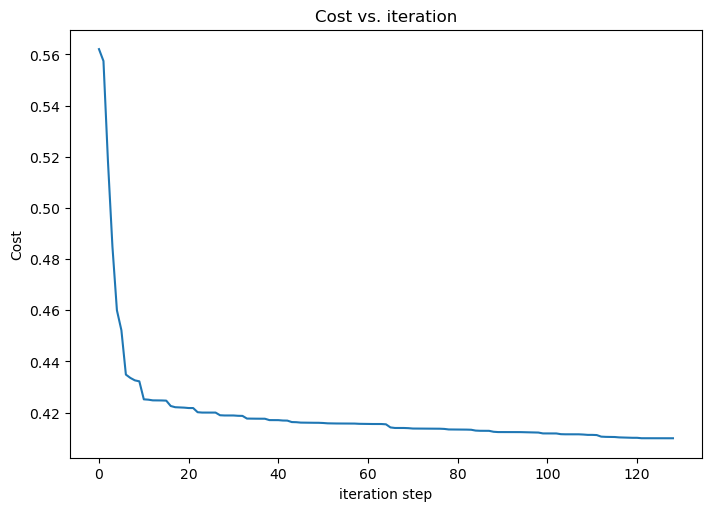

In [28]:
print(len(J_hist))
# plot cost versus iteration  
fig, ax1 = plt.subplots(1, 1, constrained_layout=True, figsize=(7, 5))
ax1.plot(J_hist[:])
# ax2.plot(100 + np.arange(len(J_hist[100:])), J_hist[100:])
ax1.set_title("Cost vs. iteration")
ax1.set_ylabel('Cost')              
ax1.set_xlabel('iteration step')   
plt.show()


In [60]:
#print(x.shape)
z_1 =  np.matmul(x,w_opti)
h = sigmoid(z_1)
# p = np.round(h)
# print(p)
h = np.where(h > 0.5 , 1, 0)
 #print(sum(h))
print( "Accuracy : " , sum(h==y)/len(y)*100, "%" )

Accuracy :  82.08866351657639 %


In [61]:
rain_test_data = pd.read_csv("weather_test.csv")
display(rain_train_data)


,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainTomorrow
0,13.4,22.9,0.6,5.52876,7.568706,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.00000,4.487216,16.9,21.8,0
1,7.4,25.1,0.0,5.52876,7.568706,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,4.43216,4.487216,17.2,24.3,0
2,12.9,25.7,0.0,5.52876,7.568706,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,4.43216,2.000000,21.0,23.2,0
3,9.2,28.0,0.0,5.52876,7.568706,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,4.43216,4.487216,18.1,26.5,0
4,17.5,32.3,1.0,5.52876,7.568706,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.00000,8.000000,17.8,29.7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52057,-1.2,15.1,0.4,5.52876,7.568706,15.0,0.0,7.0,100.0,38.0,1028.8,1026.3,4.43216,4.487216,-0.4,14.7,0
52058,-0.4,14.0,0.0,5.52876,7.568706,24.0,0.0,15.0,83.0,44.0,1029.5,1025.0,4.43216,4.487216,6.0,13.1,0
52059,-3.5,13.4,0.0,5.52876,7.568706,33.0,6.0,13.0,100.0,38.0,1022.0,1016.1,4.43216,4.487216,0.1,12.9,0
52060,0.1,14.5,0.0,5.52876,7.568706,35.0,9.0,17.0,64.0,43.0,1017.1,1015.4,4.43216,4.487216,9.5,13.1,0


In [62]:
rain_test_data["RainTomorrow"].replace("No",0,inplace=True)
rain_test_data["RainTomorrow"].replace("Yes",1,inplace=True)
display(rain_train_data)


,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainTomorrow
0,13.4,22.9,0.6,5.52876,7.568706,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.00000,4.487216,16.9,21.8,0
1,7.4,25.1,0.0,5.52876,7.568706,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,4.43216,4.487216,17.2,24.3,0
2,12.9,25.7,0.0,5.52876,7.568706,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,4.43216,2.000000,21.0,23.2,0
3,9.2,28.0,0.0,5.52876,7.568706,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,4.43216,4.487216,18.1,26.5,0
4,17.5,32.3,1.0,5.52876,7.568706,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.00000,8.000000,17.8,29.7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52057,-1.2,15.1,0.4,5.52876,7.568706,15.0,0.0,7.0,100.0,38.0,1028.8,1026.3,4.43216,4.487216,-0.4,14.7,0
52058,-0.4,14.0,0.0,5.52876,7.568706,24.0,0.0,15.0,83.0,44.0,1029.5,1025.0,4.43216,4.487216,6.0,13.1,0
52059,-3.5,13.4,0.0,5.52876,7.568706,33.0,6.0,13.0,100.0,38.0,1022.0,1016.1,4.43216,4.487216,0.1,12.9,0
52060,0.1,14.5,0.0,5.52876,7.568706,35.0,9.0,17.0,64.0,43.0,1017.1,1015.4,4.43216,4.487216,9.5,13.1,0


In [63]:
mean_1 = np.mean(rain_test_data["Cloud9am"])
mean_2 = np.mean(rain_test_data["Cloud3pm"])
mean_3 = np.mean(rain_test_data["Evaporation"])
mean_4 = np.mean(rain_test_data["Sunshine"])
mean_5 = np.mean(rain_test_data["WindGustSpeed"])
mean_6 = np.mean(rain_test_data["WindSpeed9am"])
mean_7 = np.mean(rain_test_data["WindSpeed3pm"])
mean_8 = np.mean(rain_test_data["Humidity3pm"])
mean_9 = np.mean(rain_test_data["Pressure9am"])
mean_10 = np.mean(rain_test_data["Pressure3pm"])
mean_11 = np.mean(rain_test_data["Temp9am"])
mean_12 = np.mean(rain_test_data["Temp3pm"])
mean_13 = np.mean(rain_test_data["MinTemp"])
mean_14 = np.mean(rain_test_data["MaxTemp"])
mean_15 = np.mean(rain_test_data["Rainfall"])
mean_16 = np.mean(rain_test_data["Humidity9am"])

rain_test_data["Cloud9am"].fillna(value = mean_1,inplace=True)
rain_test_data["Cloud3pm"].fillna(value = mean_2,inplace=True)
rain_test_data["Evaporation"].fillna(value = mean_3,inplace=True)
rain_test_data["Sunshine"].fillna(value = mean_4,inplace=True)
rain_test_data["WindGustSpeed"].fillna(value = mean_5,inplace=True)
rain_test_data["WindSpeed9am"].fillna(value = mean_6,inplace=True)
rain_test_data["WindSpeed3pm"].fillna(value = mean_7,inplace=True)
rain_test_data["Humidity3pm"].fillna(value = mean_8,inplace=True)
rain_test_data["Pressure9am"].fillna(value = mean_9,inplace=True)
rain_test_data["Pressure3pm"].fillna(value = mean_10,inplace=True)
rain_test_data["Temp9am"].fillna(value = mean_11,inplace=True)
rain_test_data["Temp3pm"].fillna(value = mean_12,inplace=True)
rain_test_data["MinTemp"].fillna(value = mean_13,inplace=True)
rain_test_data["MaxTemp"].fillna(value = mean_14,inplace=True)
rain_test_data["Rainfall"].fillna(value = mean_15,inplace=True)
rain_test_data["Humidity9am"].fillna(value = mean_16,inplace=True)
display(rain_test_data)


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,11-01-2014,PearceRAAF,19.0,44.500000,0.0,6.096236,13.100000,E,54.000000,E,...,27.0,10.0,1015.3,1009.7,3.780706,3.935895,31.2,42.9,No,0.0
1,12-01-2014,PearceRAAF,31.2,44.300000,0.0,6.096236,12.200000,E,54.000000,N,...,10.0,22.0,1007.7,1007.8,3.780706,3.935895,40.2,35.8,No,0.0
2,13-01-2014,PearceRAAF,19.3,30.300000,0.0,6.096236,9.400000,WSW,46.000000,SSW,...,63.0,43.0,1010.9,1009.5,7.000000,2.000000,23.2,27.6,No,0.0
3,14-01-2014,PearceRAAF,14.0,29.700000,0.0,6.096236,13.100000,WSW,44.000000,SSE,...,43.0,29.0,1012.2,1009.5,0.000000,0.000000,23.0,29.0,No,0.0
4,15-01-2014,PearceRAAF,12.7,27.900000,0.0,6.096236,12.400000,W,50.000000,NW,...,48.0,34.0,1008.4,1008.4,1.000000,3.000000,23.4,25.7,No,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29088,21-06-2017,Uluru,2.8,23.400000,0.0,6.096236,8.422771,E,31.000000,SE,...,51.0,24.0,1024.6,1020.3,3.780706,3.935895,10.1,22.4,No,0.0
29089,22-06-2017,Uluru,3.6,25.300000,0.0,6.096236,8.422771,NNW,22.000000,SE,...,56.0,21.0,1023.5,1019.1,3.780706,3.935895,10.9,24.5,No,0.0
29090,23-06-2017,Uluru,5.4,26.900000,0.0,6.096236,8.422771,N,37.000000,SE,...,53.0,24.0,1021.0,1016.8,3.780706,3.935895,12.5,26.1,No,0.0
29091,24-06-2017,Uluru,7.8,27.000000,0.0,6.096236,8.422771,SE,28.000000,SSE,...,51.0,24.0,1019.4,1016.5,3.000000,2.000000,15.1,26.0,No,0.0


In [64]:
rain_test_data = rain_test_data.drop(["Date","Location","WindGustDir","WindDir9am","WindDir3pm","RainToday"],axis=1)
display(rain_test_data)

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainTomorrow
0,19.0,44.500000,0.0,6.096236,13.100000,54.000000,26.0,15.0,27.0,10.0,1015.3,1009.7,3.780706,3.935895,31.2,42.9,0.0
1,31.2,44.300000,0.0,6.096236,12.200000,54.000000,31.0,30.0,10.0,22.0,1007.7,1007.8,3.780706,3.935895,40.2,35.8,0.0
2,19.3,30.300000,0.0,6.096236,9.400000,46.000000,22.0,28.0,63.0,43.0,1010.9,1009.5,7.000000,2.000000,23.2,27.6,0.0
3,14.0,29.700000,0.0,6.096236,13.100000,44.000000,17.0,30.0,43.0,29.0,1012.2,1009.5,0.000000,0.000000,23.0,29.0,0.0
4,12.7,27.900000,0.0,6.096236,12.400000,50.000000,11.0,31.0,48.0,34.0,1008.4,1008.4,1.000000,3.000000,23.4,25.7,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29088,2.8,23.400000,0.0,6.096236,8.422771,31.000000,13.0,11.0,51.0,24.0,1024.6,1020.3,3.780706,3.935895,10.1,22.4,0.0
29089,3.6,25.300000,0.0,6.096236,8.422771,22.000000,13.0,9.0,56.0,21.0,1023.5,1019.1,3.780706,3.935895,10.9,24.5,0.0
29090,5.4,26.900000,0.0,6.096236,8.422771,37.000000,9.0,9.0,53.0,24.0,1021.0,1016.8,3.780706,3.935895,12.5,26.1,0.0
29091,7.8,27.000000,0.0,6.096236,8.422771,28.000000,13.0,7.0,51.0,24.0,1019.4,1016.5,3.000000,2.000000,15.1,26.0,0.0


In [65]:
x_rain_test_data = rain_test_data.drop(["RainTomorrow"],axis=1)
y_rain_test_data = rain_test_data["RainTomorrow"]
display(x_rain_test_data)

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
0,19.0,44.500000,0.0,6.096236,13.100000,54.000000,26.0,15.0,27.0,10.0,1015.3,1009.7,3.780706,3.935895,31.2,42.9
1,31.2,44.300000,0.0,6.096236,12.200000,54.000000,31.0,30.0,10.0,22.0,1007.7,1007.8,3.780706,3.935895,40.2,35.8
2,19.3,30.300000,0.0,6.096236,9.400000,46.000000,22.0,28.0,63.0,43.0,1010.9,1009.5,7.000000,2.000000,23.2,27.6
3,14.0,29.700000,0.0,6.096236,13.100000,44.000000,17.0,30.0,43.0,29.0,1012.2,1009.5,0.000000,0.000000,23.0,29.0
4,12.7,27.900000,0.0,6.096236,12.400000,50.000000,11.0,31.0,48.0,34.0,1008.4,1008.4,1.000000,3.000000,23.4,25.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29088,2.8,23.400000,0.0,6.096236,8.422771,31.000000,13.0,11.0,51.0,24.0,1024.6,1020.3,3.780706,3.935895,10.1,22.4
29089,3.6,25.300000,0.0,6.096236,8.422771,22.000000,13.0,9.0,56.0,21.0,1023.5,1019.1,3.780706,3.935895,10.9,24.5
29090,5.4,26.900000,0.0,6.096236,8.422771,37.000000,9.0,9.0,53.0,24.0,1021.0,1016.8,3.780706,3.935895,12.5,26.1
29091,7.8,27.000000,0.0,6.096236,8.422771,28.000000,13.0,7.0,51.0,24.0,1019.4,1016.5,3.000000,2.000000,15.1,26.0


In [66]:
m,n = x_rain_test_data.shape
x_features = x_rain_test_data.columns

for i in range(n):
    diff_1 = (x_rain_test_data.iloc[:,i])-min(x_rain_test_data.iloc[:,i])
    diff_2 = max(x_rain_test_data.iloc[:,i]) - min(x_rain_test_data.iloc[:,i])
    z_norm = diff_1/diff_2
    x_rain_test_data[x_features[i]] = z_norm

In [67]:
x_rain_test_data

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
0,0.664835,0.954198,0.0,0.121439,0.922535,0.387097,0.412698,0.238095,0.262626,0.090909,0.567753,0.5216,0.472588,0.491987,0.788235,0.955882
1,1.000000,0.949109,0.0,0.121439,0.859155,0.387097,0.492063,0.476190,0.090909,0.212121,0.437393,0.4912,0.472588,0.491987,1.000000,0.781863
2,0.673077,0.592875,0.0,0.121439,0.661972,0.322581,0.349206,0.444444,0.626263,0.424242,0.492281,0.5184,0.875000,0.250000,0.600000,0.580882
3,0.527473,0.577608,0.0,0.121439,0.922535,0.306452,0.269841,0.476190,0.424242,0.282828,0.514580,0.5184,0.000000,0.000000,0.595294,0.615196
4,0.491758,0.531807,0.0,0.121439,0.873239,0.354839,0.174603,0.492063,0.474747,0.333333,0.449400,0.5008,0.125000,0.375000,0.604706,0.534314
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29088,0.219780,0.417303,0.0,0.121439,0.593153,0.201613,0.206349,0.174603,0.505051,0.232323,0.727273,0.6912,0.472588,0.491987,0.291765,0.453431
29089,0.241758,0.465649,0.0,0.121439,0.593153,0.129032,0.206349,0.142857,0.555556,0.202020,0.708405,0.6720,0.472588,0.491987,0.310588,0.504902
29090,0.291209,0.506361,0.0,0.121439,0.593153,0.250000,0.142857,0.142857,0.525253,0.232323,0.665523,0.6352,0.472588,0.491987,0.348235,0.544118
29091,0.357143,0.508906,0.0,0.121439,0.593153,0.177419,0.206349,0.111111,0.505051,0.232323,0.638079,0.6304,0.375000,0.250000,0.409412,0.541667


In [68]:
x_1=np.array(x_rain_test_data)
y_1=np.array(y_rain_test_data)

In [69]:
m, n = x_1.shape
print(m,n)
x_1 = np.concatenate([np.ones((m,1)), x_1], axis = 1)
#m, n = x.shape
print(x_1.shape)
print(n)
print(m)

29093 16
(29093, 17)
16
29093


In [70]:
z_2 =  np.matmul(x_1,w_opti)
h_1 = sigmoid(z_2)
# p_1 = np.round(h_1)
# print(p_1)
h_1 = np.where(h_1 > 0.5 , 1, 0)
 #print(sum(h))
print( "Accuracy : " , sum(h_1==y_1)/len(y_1)*100, "%" )

Accuracy :  84.73859691334685 %


</h> Hence on the testing data the accuracy is given above